<a href="https://colab.research.google.com/github/Hojiakbardevs/Datascience/blob/main/Polinomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
datas = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv")
datas.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


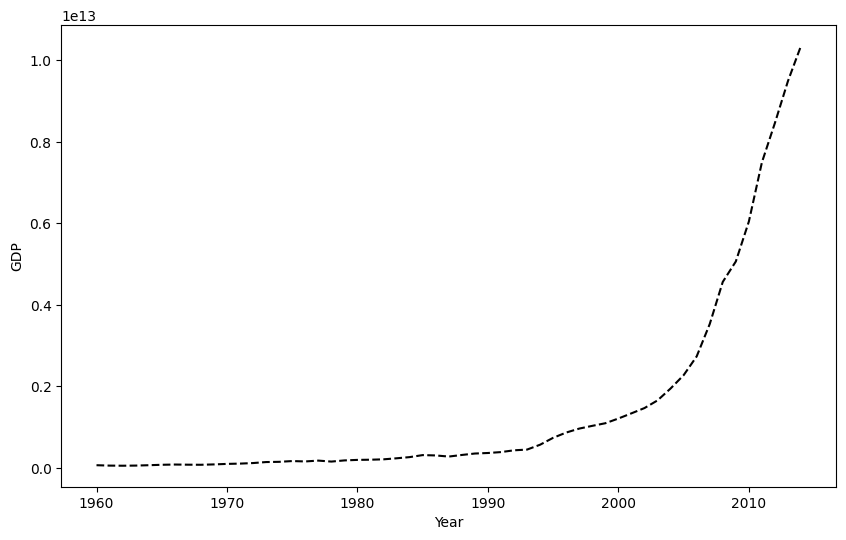

In [17]:
plt.figure(figsize=(10,6))
x_data, y_data = (datas['Year'],datas['Value'])
plt.plot(x_data, y_data, '--', color='k')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [18]:
X = np.asanyarray(datas[['Year']]/datas.Year.max())
Y = np.asanyarray(datas[['Value']]/datas.Value.max())

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [20]:
yhat = model.predict(X)


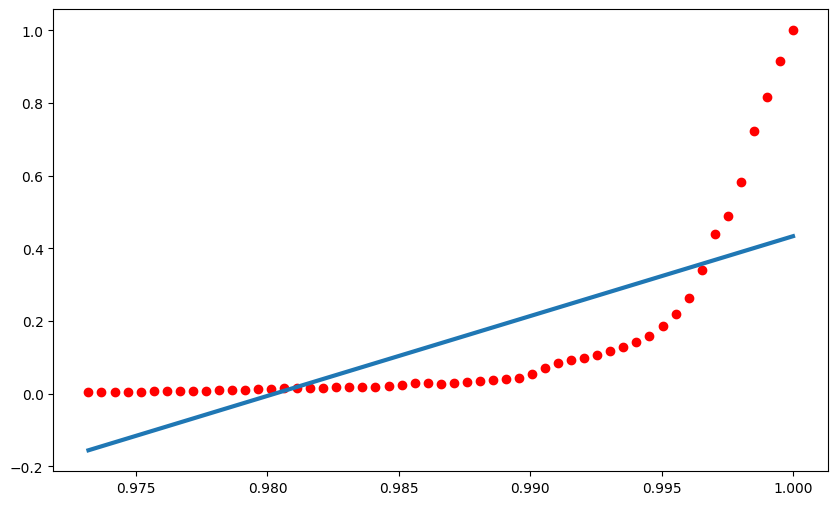

In [26]:
plt.figure(figsize = (10,6))
plt.plot(X,Y, 'ro', label ='data')
plt.plot(X, yhat, linewidth = 3.0, label = 'fit')
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error
print("Mae:", mean_absolute_error(yhat,Y))

Mae: 0.12657979406214762


In [29]:
X[0]

array([0.97318769])

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly_features =PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [33]:
model.fit(X_poly,Y)

LinearRegression()

In [36]:
yhat = model.predict(X_poly)
yhat

array([[0.00124025],
       [0.00464582],
       [0.0067836 ],
       [0.00796306],
       [0.0084523 ],
       [0.00847626],
       [0.0082289 ],
       [0.0078721 ],
       [0.00752866],
       [0.00730276],
       [0.00726569],
       [0.00746763],
       [0.00793815],
       [0.0086906 ],
       [0.00971949],
       [0.01100445],
       [0.01252019],
       [0.01423204],
       [0.01609826],
       [0.01806843],
       [0.02010334],
       [0.02216256],
       [0.02419925],
       [0.02618718],
       [0.02810216],
       [0.02993846],
       [0.03170085],
       [0.03340816],
       [0.03510976],
       [0.03686786],
       [0.03876996],
       [0.04093742],
       [0.04351974],
       [0.04668975],
       [0.05067086],
       [0.05570745],
       [0.06210327],
       [0.07018638],
       [0.08034146],
       [0.09299767],
       [0.10863483],
       [0.12778199],
       [0.15102983],
       [0.17902553],
       [0.21247447],
       [0.25214422],
       [0.29887211],
       [0.353

<ipython-input-47-8059029f3158>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X,Y,'ro', label = 'data', color='k')


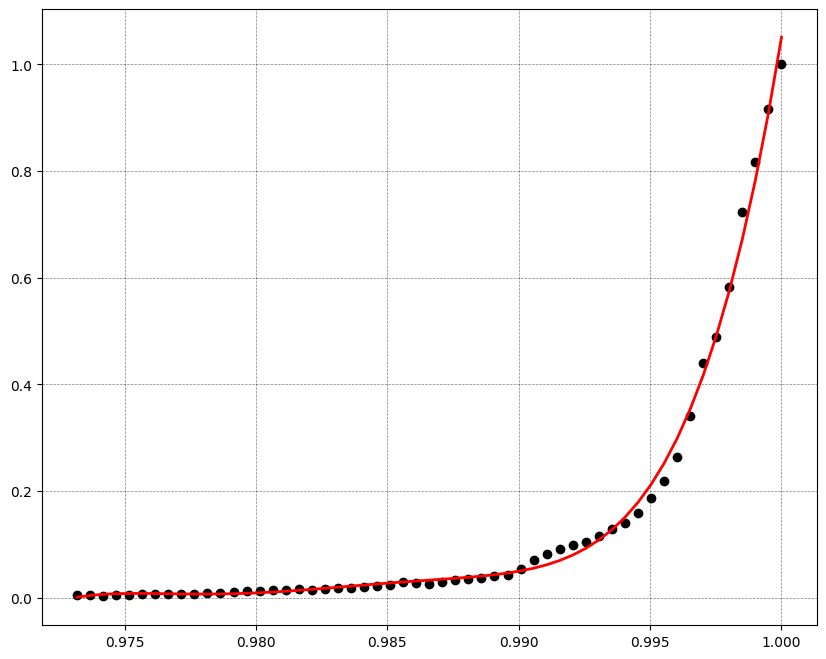

In [47]:
plt.figure(figsize=(10,8))
plt.plot(X,Y,'ro', label = 'data', color='k')
plt.plot(X,yhat, linewidth = 2.0, label="fit", color='r')
plt.grid(color = 'k', linestyle = '--', linewidth = 0.5, alpha = 0.5)
plt.show()

In [48]:
print("Mae:", mean_absolute_error(yhat,Y))

Mae: 0.009253921906050316


# curve fit ni o'rganamiz

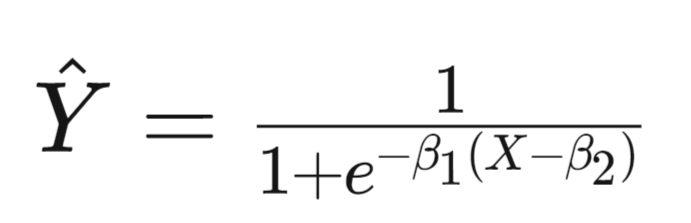


In [51]:
x_data, y_data = (datas['Year'].values, datas['Value'].values)
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)


array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [52]:
def sigmoid(x, Beta_1, Beta_2):
  y = 1/ (1 + np.exp(-Beta_1 * (x - Beta_2)))
  return y

In [53]:
from scipy.optimize import curve_fit

beta, pcov = curve_fit(sigmoid, xdata, ydata)
print(f"beta1={beta[0]}\nbeta2={beta[1]}")

beta1=690.4517092123388
beta2=0.9972071272529931


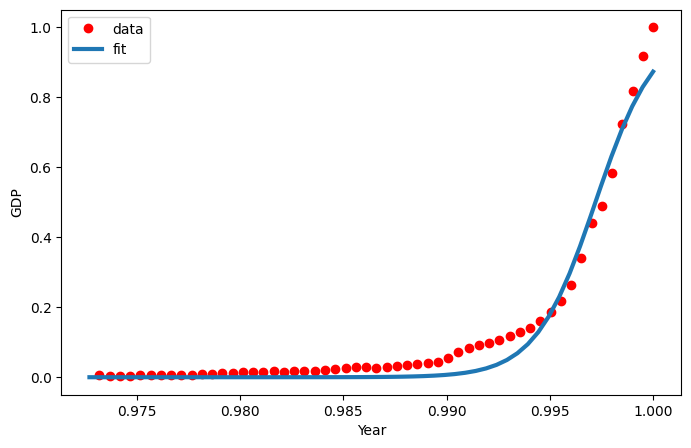

In [54]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
yhat = sigmoid(x, *beta)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [55]:
print("MAE:", mean_absolute_error(yhat,ydata))

MAE: 0.030498418823495136
